<a href="https://www.kaggle.com/code/mikedelong/food-waste-data-import-scatter-plots?scriptVersionId=139029225" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/food-waste/Food Waste data and research - by country.csv')
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [3]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [4]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

Let's look at the columns that have the same units and give them more readable names. The kg/capita/year quantities can be more fairly compared since tonnes/year have population embedded in them that will be difficult to extract.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


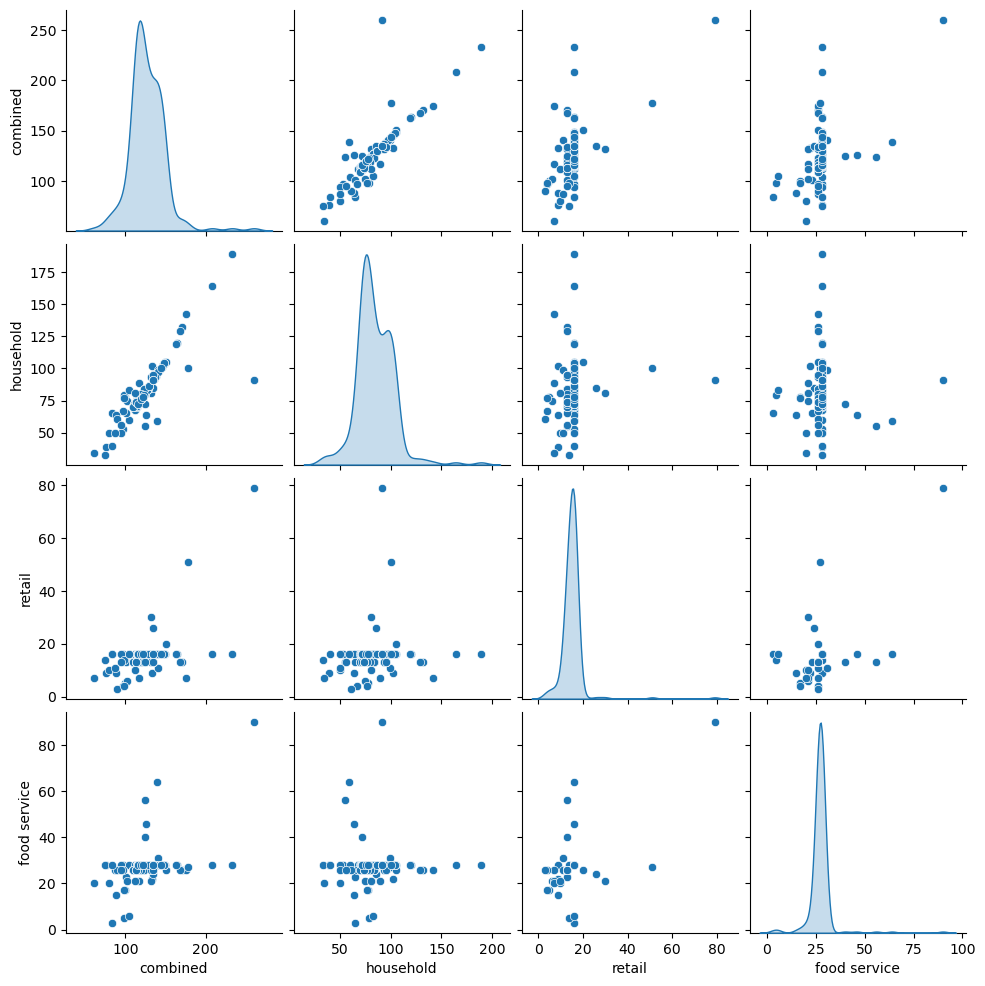

In [5]:
from seaborn import pairplot
kg_columns = [item for item in df.columns if 'kg' in item]
readable_columns = ['combined', 'household', 'retail', 'food service']
pairplot(data=df[kg_columns].rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), diag_kind='kde')

It is fairly easy to see from the fairly linear relationship between household and combined (and also by the ticks on the y-axis) that household waste dominates the total.

In [6]:
from plotly.express import scatter
scatter(data_frame=df.rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), x='household', y='combined', color='Region', hover_data='Country')

Let's look at this again for one of the other components.

In [7]:
scatter(data_frame=df.rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), x='food service', y='combined', color='Region', hover_data='Country')

The way these line up suggest we may have a data quality issue.

In [8]:
scatter(data_frame=df.rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), x='food service', y='combined', color='Confidence in estimate', hover_data='Country')

Yeah it looks like somebody is fudging the food service waste numbers.

In [9]:
scatter(data_frame=df.rename(columns={kg_columns[index]: readable_columns[index] for index in range(len(kg_columns))}), x='retail', y='combined', color='Confidence in estimate', hover_data='Country')

And maybe fudging the retail numbers. Does the confidence correlate much with the region?

<Axes: ylabel='Region'>

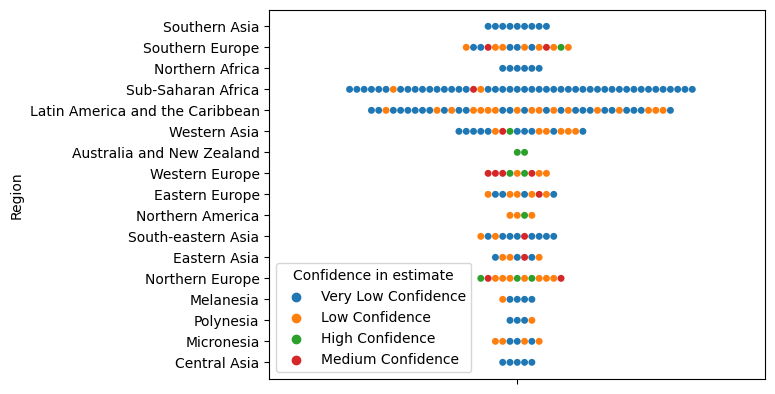

In [10]:
from seaborn import swarmplot
swarmplot(data=df, y='Region', hue='Confidence in estimate',)

Somewhat; but basically the data is mostly low confidence. This comes through pretty clearly in the dread single-column pie chart.

<Axes: ylabel='Confidence in estimate'>

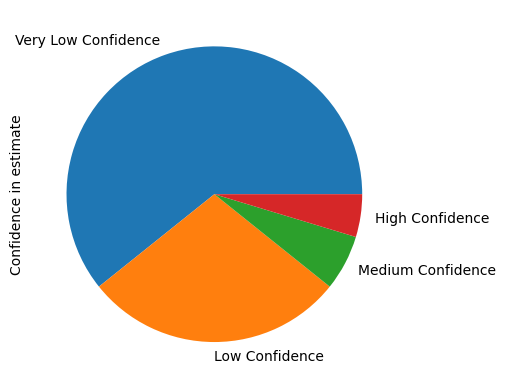

In [11]:
df['Confidence in estimate'].value_counts().plot(kind='pie')

I probably should have done this first. Or looked at one of the other notebooks where this was the first thing the author did.

<Axes: ylabel='Frequency'>

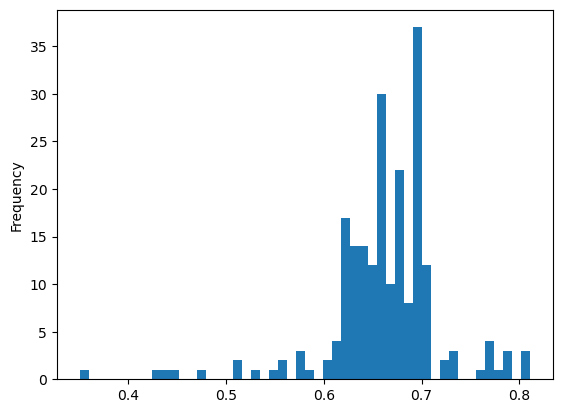

In [12]:
df['household ratio'] = df['Household estimate (kg/capita/year)'] / df ['combined figures (kg/capita/year)']
df['household ratio'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

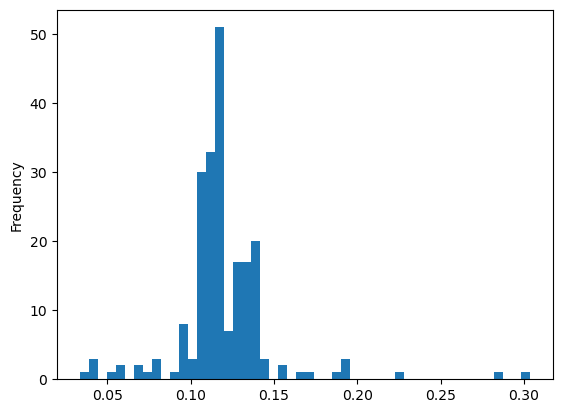

In [13]:
df['retail ratio'] = df['Retail estimate (kg/capita/year)'] / df['combined figures (kg/capita/year)']
df['retail ratio'].plot.hist(bins=50)

<Axes: xlabel='household ratio', ylabel='Count'>

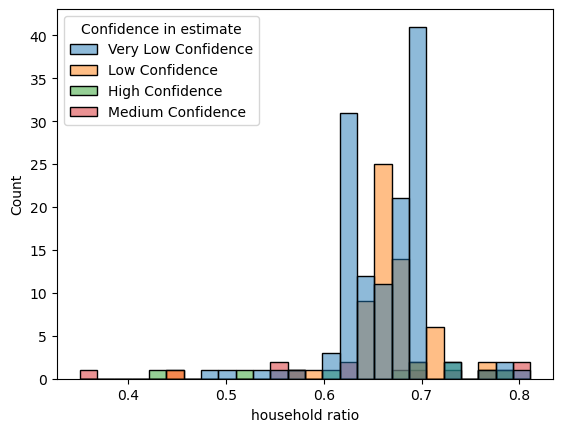

In [14]:
from seaborn import histplot
histplot(data=df, x='household ratio', hue='Confidence in estimate')

<Axes: xlabel='retail ratio', ylabel='Count'>

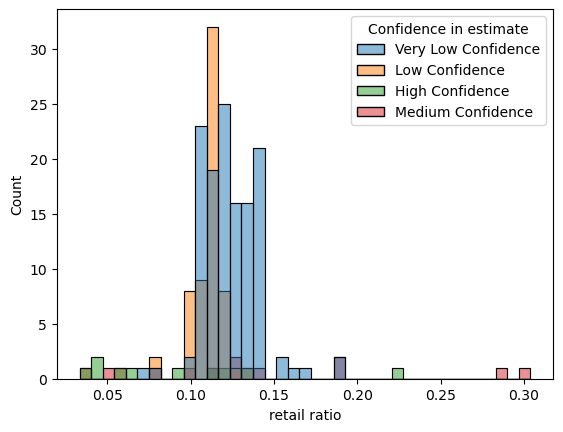

In [15]:
histplot(data=df, x='retail ratio', hue='Confidence in estimate')

Basically the ratios for the low-confidence data cluster while the higher-confidence ratios do not.